# РК1
## Вариант 7.


*   Студент - Кожуро Б.Е.
*   Группа - ИУ5-21М
*   Вариант - 7




### Задача №7.
Для набора данных проведите устранение пропусков для одного (произвольного) числового признака с использованием метода заполнения медианой.

Датасет https://www.kaggle.com/datasets/syedanwarafridi/vehicle-sales-data

1. year              int64
2. make             object
3. model            object
4. trim             object
5. body             object
6. transmission     object
7. vin              object
8. state            object
9. condition       float64
10. odometer        float64
11. color            object
12. interior         object
13. seller           object
14. mmr               int64
15. sellingprice      int64
16. saledate         object





In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline
sns.set(style="ticks")

In [4]:
data = pd.read_csv('car_prices.csv', sep=",")

In [5]:
data.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition       11820
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

In [6]:
data.dtypes

year              int64
make             object
model            object
trim             object
body             object
transmission     object
vin              object
state            object
condition       float64
odometer        float64
color            object
interior         object
seller           object
mmr             float64
sellingprice    float64
saledate         object
dtype: object

In [7]:
data.shape

(558837, 16)

Заполним модой значение condition.

In [8]:
temp_data = data[['condition']].values
size = temp_data.shape[0]

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='median')
all_data = imputer.fit_transform(temp_data)

median_df = data.copy()
median_df['condition'] = all_data

In [9]:
median_df.isna().sum()

year                0
make            10301
model           10399
trim            10651
body            13195
transmission    65352
vin                 4
state               0
condition           0
odometer           94
color             749
interior          749
seller              0
mmr                38
sellingprice       12
saledate           12
dtype: int64

###Задача №27.
Для набора данных для одного (произвольного) числового признака проведите обнаружение и замену (найденными верхними и нижними границами) выбросов на основе 5% и 95% квантилей.

In [10]:
def diagnostic_plots(df, variable, title):
    fig, ax = plt.subplots(figsize=(10,7))
    # гистограмма
    plt.subplot(2, 2, 1)
    df[variable].hist(bins=30)
    ## Q-Q plot
    plt.subplot(2, 2, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    # ящик с усами
    plt.subplot(2, 2, 3)
    sns.violinplot(x=df[variable])
    # ящик с усами
    plt.subplot(2, 2, 4)
    sns.boxplot(x=df[variable])
    fig.suptitle(title)
    plt.show()

<ipython-input-10-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


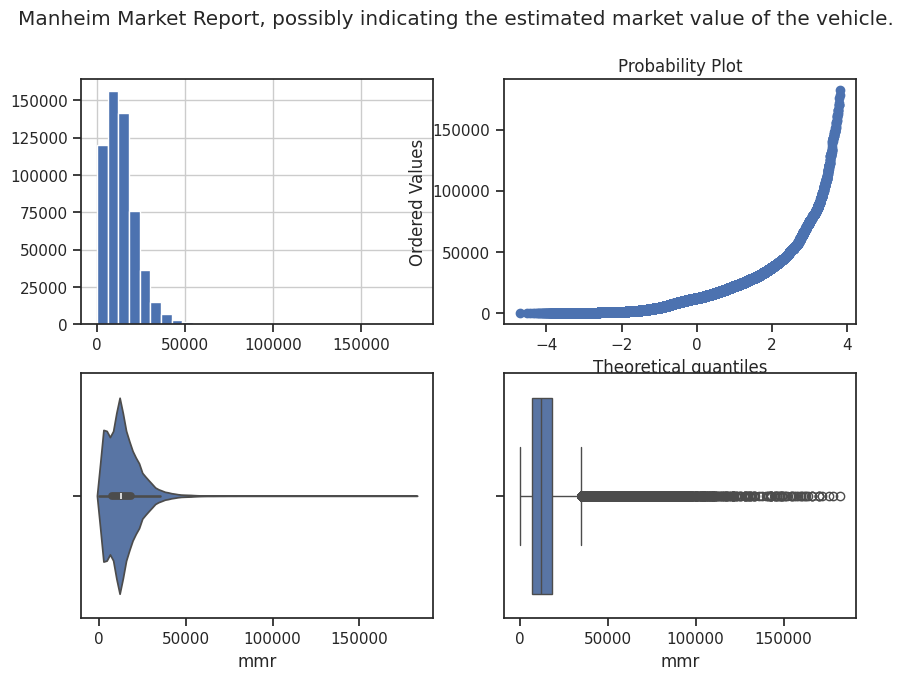

In [11]:
diagnostic_plots(median_df, 'mmr','Manheim Market Report, possibly indicating the estimated market value of the vehicle.')

Распределение отличается от нормального, при этом ассиметричное - лучше было бы использовать IRQ.

In [12]:
# Функция вычисления верхней и нижней границы выбросов
def get_outlier_boundaries(df, col):
    lower_boundary = df[col].quantile(0.05)
    upper_boundary = df[col].quantile(0.95)
    return lower_boundary, upper_boundary

<ipython-input-10-766c933c159f>:4: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2, 2, 1)


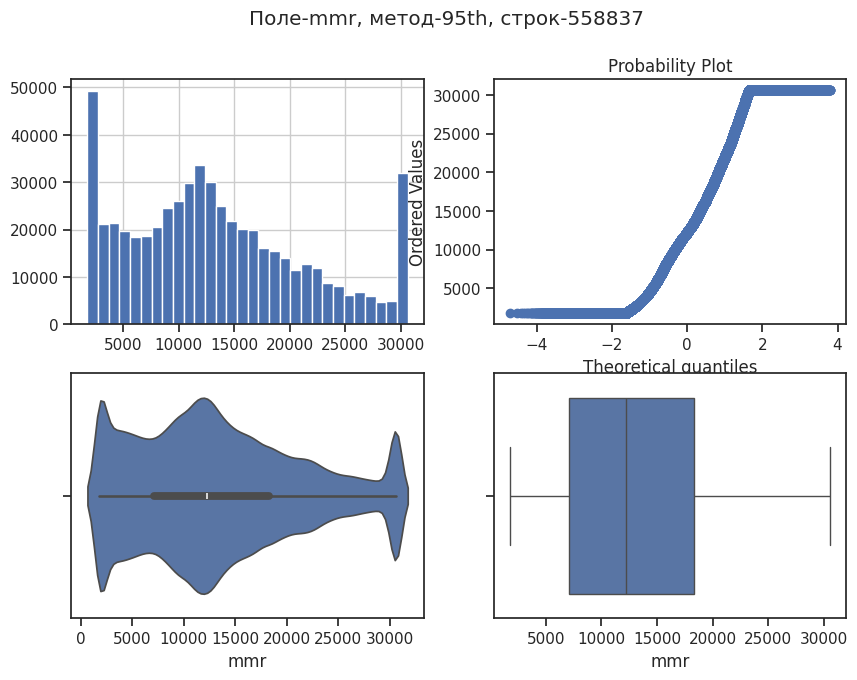

In [13]:
col = 'mmr'
lower_boundary, upper_boundary = get_outlier_boundaries(median_df, col)
median_df[col] = np.where(median_df[col] > upper_boundary, upper_boundary,  np.where(median_df[col] < lower_boundary, lower_boundary, median_df[col]))
title = 'Поле-{}, метод-{}, строк-{}'.format(col, '95th', median_df.shape[0])
diagnostic_plots(median_df, col, title)

Text(0, 0.5, 'sellingprice')

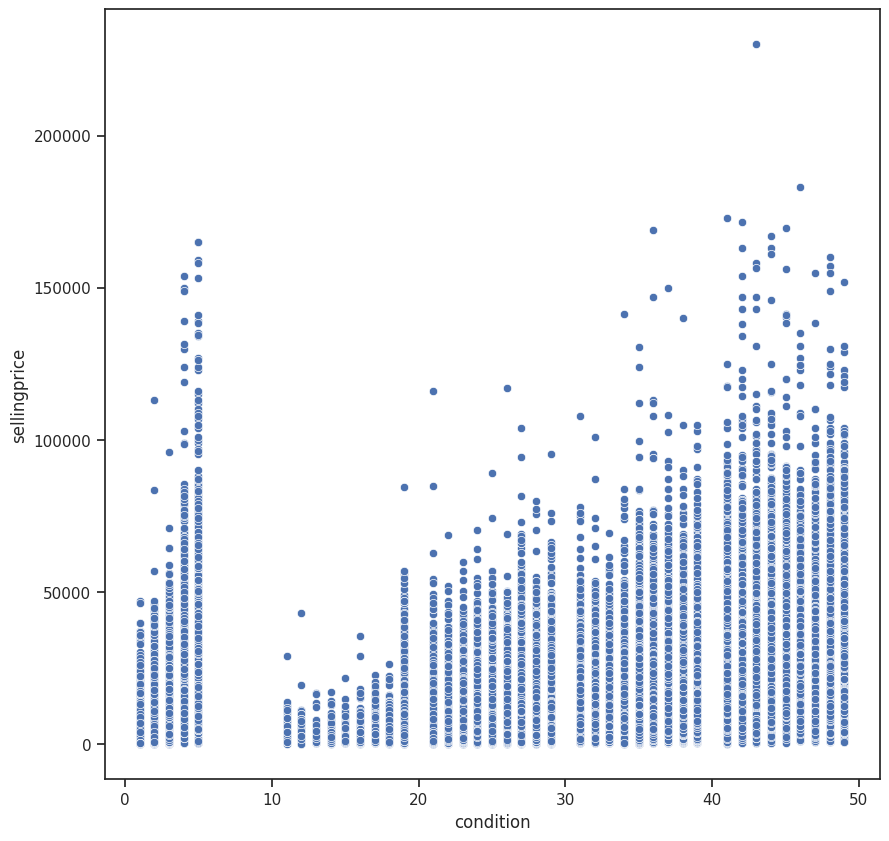

In [14]:
# Диаграмма рассеяния
fig, ax = plt.subplots(figsize=(10,10))
sns.scatterplot(ax=ax, x='condition', y='sellingprice', data = median_df)
plt.xlabel('condition')
plt.ylabel('sellingprice')